In [7]:
import numpy as np

data_pine = np.loadtxt('pine_full.csv',skiprows=1,delimiter=",")

def regression_fit(X,y):
    n,p = X.shape
    X = np.concatenate([np.ones((n,1)), X], axis=1)
    alpha = np.linalg.solve(X.T@X, X.T@y)
    return alpha

def regression_predict(X,alpha):
    return X@alpha[1:] + alpha[0]

pine_y = data_pine[:,-1]
pine_X = data_pine[:,:-1]
n,p = pine_X.shape

In [6]:
print(n,p)

58 10


{'whiskers': [<matplotlib.lines.Line2D at 0x7de09f3ea2f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de09f2103d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de09f3ea9e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7de09f210940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7de09f210be0>,
 'means': []}

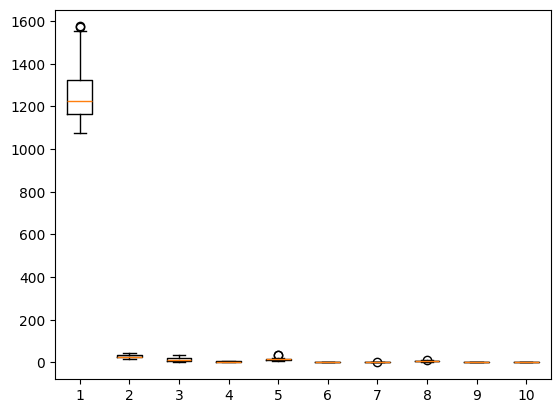

In [11]:
plt.boxplot(pine_X)

{'whiskers': [<matplotlib.lines.Line2D at 0x7de09f131b40>,
 'caps': [<matplotlib.lines.Line2D at 0x7de09f132080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de09f1318a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7de09f1325c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7de09f132860>,
 'means': []}

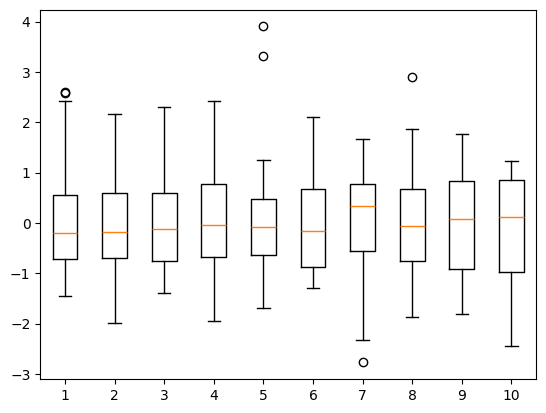

In [12]:
X_norm = (pine_X - np.mean(pine_X, axis=0))/np.std(pine_X, axis=0)
plt.boxplot(X_norm)

<BarContainer object of 11 artists>

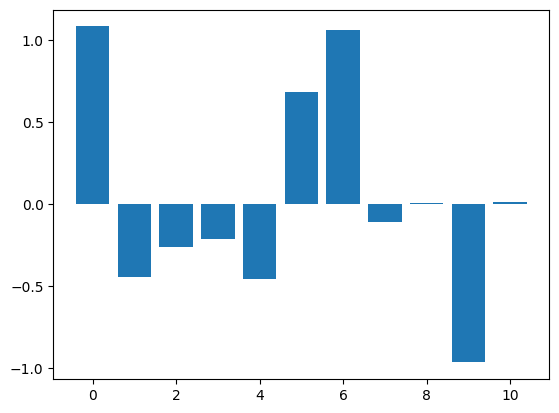

In [13]:
alpha = regression_fit(X_norm,pine_y)
plt.bar(range(p+1),alpha)

In [14]:
z = regression_predict(X_norm, alpha)

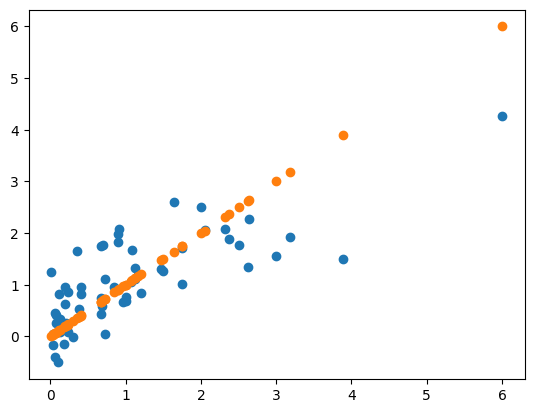

In [21]:
plt.plot(pine_y,z,'o')
plt.plot(pine_y,pine_y,'o')

-1.0910812483385159e-16

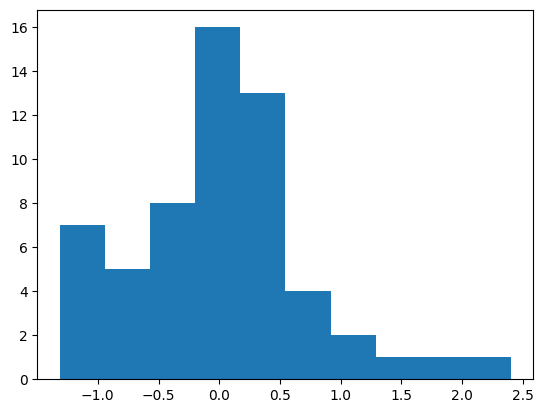

In [19]:
e = pine_y-z 
plt.hist(e)
np.mean(e)

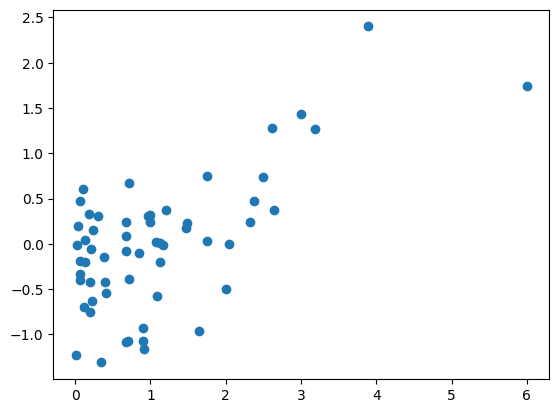

In [23]:
plt.plot(pine_y, e,'o')

In [32]:
# SCT = SCM + SCE
SCT = np.sum((pine_y - np.mean(pine_y))**2)
SCM = np.sum((z - np.mean(pine_y))**2)
SCE = np.sum(e**2)
R_2 = SCM/SCT
print(R_2)
print(1-(SCE/SCT))
print(np.corrcoef(z,pine_y)[0,1]**2)

print(SCT, SCM + SCE)

0.5813220444154013
0.5813220444154006
0.5813220444154008
73.03389137931035 73.0338913793104


In [25]:
SCT

73.03389137931035

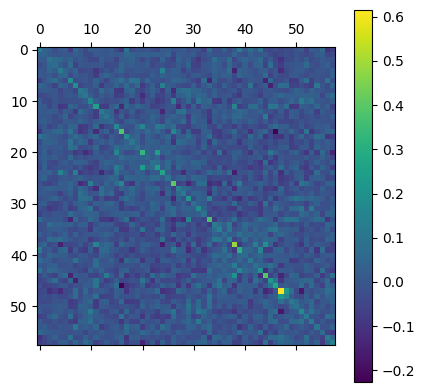

In [35]:
H = X_norm@np.linalg.inv(X_norm.T@X_norm)@X_norm.T
plt.matshow(H)
plt.colorbar()

<StemContainer object of 3 artists>

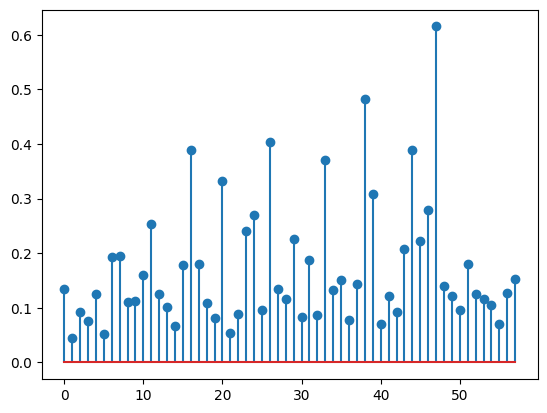

In [36]:
h = np.diag(H)
plt.stem(range(n),h)

In [37]:
np.argmax(h)

47

38

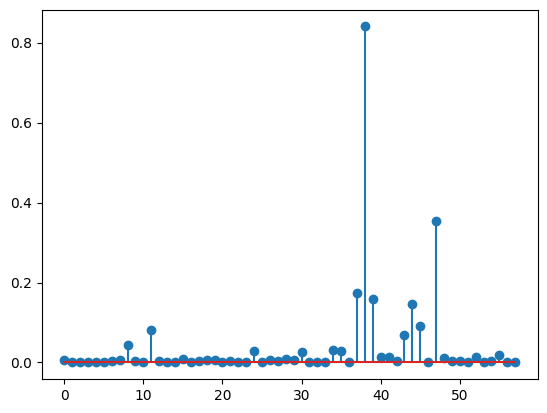

In [41]:
# contributions
s2 = np.sum(e**2)/(n-p-1)
c = (h/(p*(1-h)**2)) * ((e**2)/s2)
plt.stem(range(n), c)
np.argmax(c)

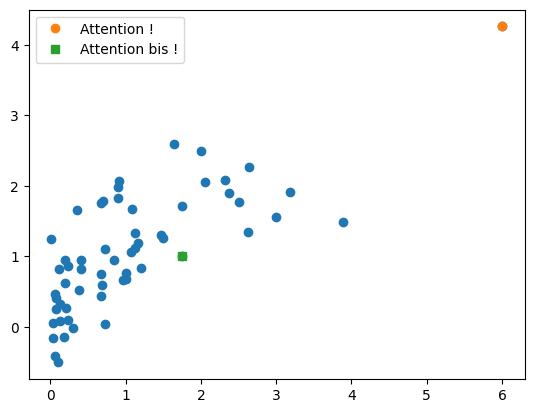

In [44]:
id = [47,38]
plt.plot(pine_y,z,'o')
plt.plot(pine_y[38], z[38],'o',label="Attention !")
plt.plot(pine_y[47], z[47],'s',label="Attention bis !")

plt.legend()

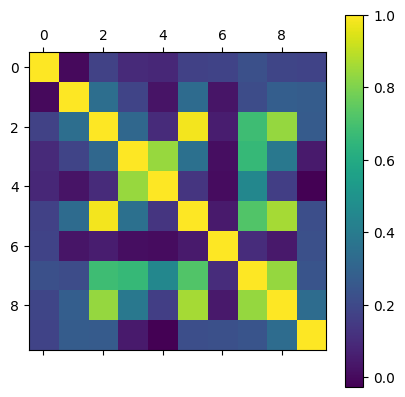

In [47]:
X_norm
corr = X_norm.T@X_norm / n
plt.matshow(corr)
plt.colorbar()

<BarContainer object of 10 artists>

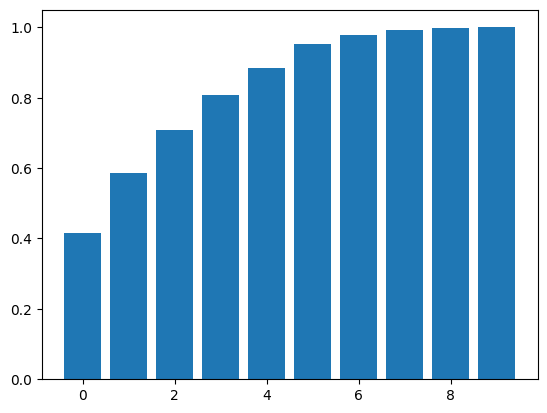

In [48]:
w,v = np.linalg.eigh(corr)
w = w[::-1]
v = v[:,::-1]
plt.bar(range(p), np.cumsum(w)/np.sum(w))

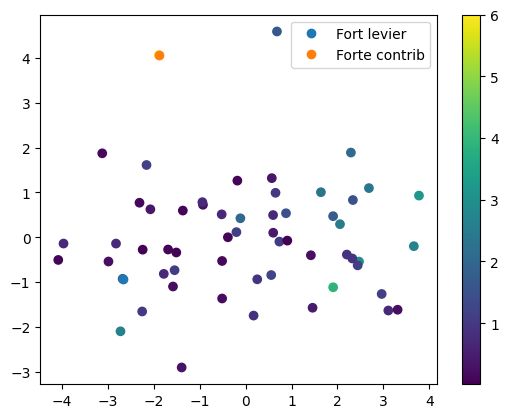

In [55]:
P = v[:,:2]
X_proj = X_norm@P
plt.scatter(X_proj[:,0], X_proj[:,1],c=pine_y)
plt.colorbar()
id_levier = np.argmax(h)
plt.plot(X_proj[id_levier,0], X_proj[id_levier,1],'o',label='Fort levier')
id_contrib = np.argmax(c)
plt.plot(X_proj[id_contrib,0], X_proj[id_contrib,1],'o',label='Forte contrib')
plt.legend()

In [56]:
pine_X[id_contrib,:]

array([1132. ,   22. ,   18. ,    7. ,   37. ,    2.5,    1.5,    9. ,
          2. ,    1.5])